# GAMES (or ADVERSARIAL SEARCH)

This notebook serves as supporting material for topics covered in **Chapter 5 - Adversarial Search** in the book *Artificial Intelligence: A Modern Approach.* This notebook uses implementations from [games4e.py](https://github.com/aimacode/aima-python/blob/master/gamese4.py) module.

### Note for running this code

The following cell is necessary to allow these examples to execute in Google Colab. We are downloading the AIMA-PYTHON repository into Google Colab to make use of some modified libraries.
<br><br>
**Remember that each time you change or (re/dis)connect your runtime, Google Colab will erase all temporary data.**

In [2]:
# Colab edition by Ghassem Tofighi
# Download and extract all necessary files
!rm -rf /content/*
!wget https://github.com/aimacode/aima-python/archive/master.zip 2>/dev/null
!unzip -q master.zip
!mv aima-python-master/* /content
# Download datasets
!wget https://github.com/aimacode/aima-data/archive/f6cbea61ad0c21c6b7be826d17af5a8d3a7c2c86.zip 2>/dev/null
!unzip -q f6cbea61ad0c21c6b7be826d17af5a8d3a7c2c86.zip
!rm -rf aima-data
!mv aima-data-f6cbea61ad0c21c6b7be826d17af5a8d3a7c2c86 aima-data
# Install additional libraries
!pip install ipythonblocks 2>/dev/null
!pip install qpsolvers 2>/dev/null

El sistema no puede encontrar la ruta especificada.
"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
mv: cannot stat 'aima-python-master/*': No such file or directory
El sistema no puede encontrar la ruta especificada.
"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
mv: cannot stat 'aima-data-f6cbea61ad0c21c6b7be826d17af5a8d3a7c2c86': No such file or directory
El sistema no puede encontrar la ruta especificada.
El sistema no puede encontrar la ruta especificada.


# CONTENTS

1. Game representation
2. Game example: Fig52 game
3. Adversarial search methods:
  * Minmax
  * Alpha-beta pruning
5. Players
6. Let's play some games!
7. Homework

In [2]:
# this notebook uses implementations from games4e.py module
from games4e import *
# for checking the source (module) code
from notebook import psource, pseudocode

## 1. Game representation

To represent games, we use the base class `Game`, which we can subclass (specialise) and override its functions to represent our own games.


In [ ]:
psource(Game)

Now let's get into details of all the methods in the `Game` class. You have to implement these methods when you create new classes that would represent your game.

* `actions(self, state)`: Given a game state, this method generates all the legal actions possible from this state, as a list or a generator. Returning a generator rather than a list has the advantage that it saves space and you can still operate on it as a list.

* `result(self, state, move)`: Given a game state and a move, this method returns the game state that you get by making that move on this game state.

* `utility(self, state, player)`: Given a terminal game state and a player, this method returns the utility for that player in the given terminal game state. While implementing this method assume that the game state is a terminal game state. The logic in this module is such that this method will be called only on terminal game states.

* `terminal_test(self, state)`: Given a game state, this method should return `True` if this game state is a terminal state, and `False` otherwise.

* `to_move(self, state)`: Given a game state, this method returns the player who is to play next. This information is typically stored in the game state, so all this method does is extract this information and return it.

* `display(self, state)`: This method prints/displays the current state of the game.

## `GameState` namedtuple

`GameState` is a [namedtuple](https://docs.python.org/3.5/library/collections.html#collections.namedtuple) representing the current state of a game. It is used to help representing games whose states can't be easily represented normally or for games that require memory of a board, like Tic-Tac-Toe.

`Gamestate` is defined as follows:

`GameState = namedtuple('GameState', 'to_move, utility, board, moves')`

* `to_move`: It represents whose turn it is to move next.

* `utility`: It stores the utility of the game state. Storing this utility is a good idea, because, when we perform a `minimax` or an `alpha-beta` search, we generate many recursive calls which travel all the way down to the terminal states. When these recursive calls go back up to the original callee, we have calculated utilities for many game states. We store these utilities in their respective `GameState` tuples to avoid calculating them all over again.

* `board`: A dictionary that stores the board of the game.

* `moves`: It stores the list of legal moves possible from the current position.

## 2. Game example: Fig52 game

This is a toy example to help understanding how adversarial search methods work.

**Read the figure caption for an overall description of this game:** there are two playes (`MAX` and `MIN`) who play one move each, starting with `MAX`. The game tree is one move deep, consisting of two half-moves (each of which is called a **ply**).

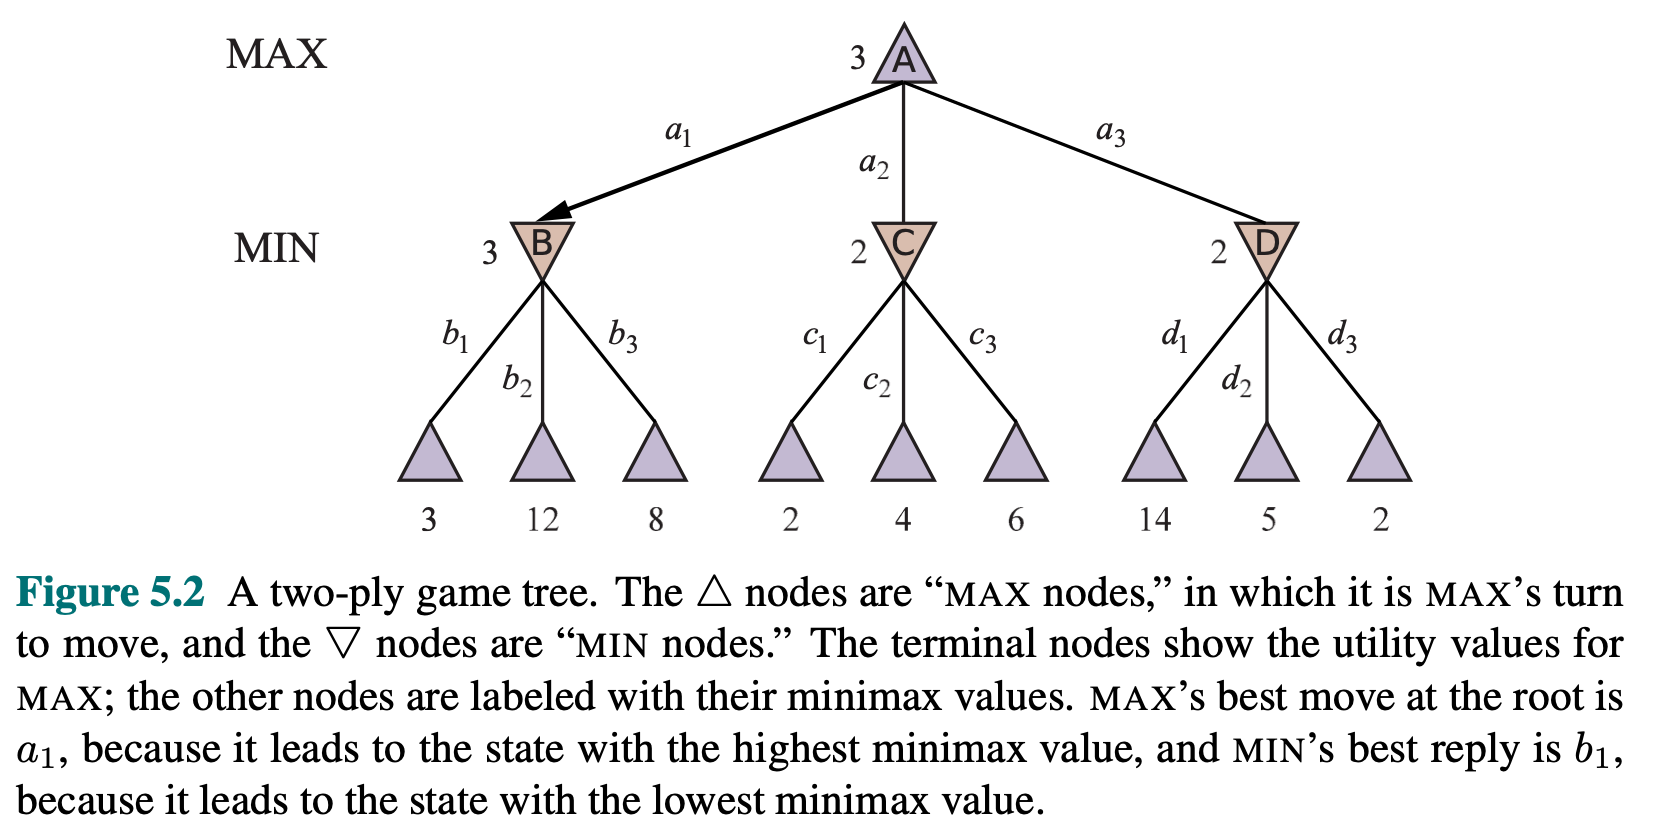

In [ ]:
from IPython.display import Image
Image(filename='/content/AIMA_W04_02.png', width = 600, height = 300)

The states are represented with capital letters inside the triangles (e.g., "A") while moves are the labels on the edges between states (e.g., "a1"). Terminal nodes carry utility values, and are named 'B1', 'B2' and 'B3' for the nodes below 'B', and so forth.

---

### 2.1 Game definition

We need to follow these steps to implement this game:
1. Specialise from the base class `Game`.
2. Define a namedtuple to model the moves, utilities and initial state.
3. Implement all the necessary methods, as discussed in section 1 above.



In [4]:
# class Fig52
class Fig52(Game):

  # namedtuple to represent moves, utilities and initial state
  # moves is a nested dictionary: the outer dictionary has 'states' as keys and all possible 'moves' as values.
  # The inner dictionary of 'moves' has the 'moves names' as keys and the 'next state' (after the move is complete) as values.
  # moves = dict(<YOUR CODE HERE>)

  # utils is a dictionary of leaf nodes (as keys) and their corresponding utility (as values)
  # utils = dict(<YOUR CODE HERE>)

  # initial state of the game
  initial = 'A'

  def actions(self, state):
    """Return a list of the allowable moves at this point."""
    pass   # delete this
    # <YOUR CODE HERE>

  def result(self, state, move):
    """Return the state that results from making a move from a state."""
    pass   # delete this
    # <YOUR CODE HERE>

  def utility(self, state, player):
    """Return the value of this final state to player. What if it is 'MIN' player playing last?"""
    pass   # delete this
    # <YOUR CODE HERE>

  def terminal_test(self, state):
    """Return True if this is a final state for the game."""
    pass   # delete this
    # <YOUR CODE HERE>

  def to_move(self, state):
     """Return the player whose move it is in this state."""
     pass   # delete this
     # <YOUR CODE HERE>

### 2.2 Game instantiation

We can instantiate an object to represent our game and checks its interface (methods).

In [6]:
# instantiate a Fig52 game object
fig52game = Fig52()

In [ ]:
# checking for actions
print(fig52game.actions('B'))

In [ ]:
# checking for the result of a particular move
print(fig52game.result('A', 'a2'))

In [ ]:
# checking for the utility value
print(fig52game.utility('C3', 'MAX'))
print(fig52game.utility('C3', 'MIN'))

In [ ]:
# checking the terminal states
print(fig52game.terminal_test('C'))

In [ ]:
# checking who should move in a particular state
print(fig52game.to_move('D'))

## 3. Adversarial search methods

### Minmax

This algorithm (often called **minimax**) computes the next move for a player (`MIN` or `MAX`) at their current state. It recursively computes the minimax value of successor states, until it reaches terminals (the leaves of the tree). Using the `utility` value of the terminal states, it computes the values of parent states until it reaches the initial node (the root of the tree).

It is worth noting that **the algorithm works in a depth-first manner**. The pseudocode can be found below:

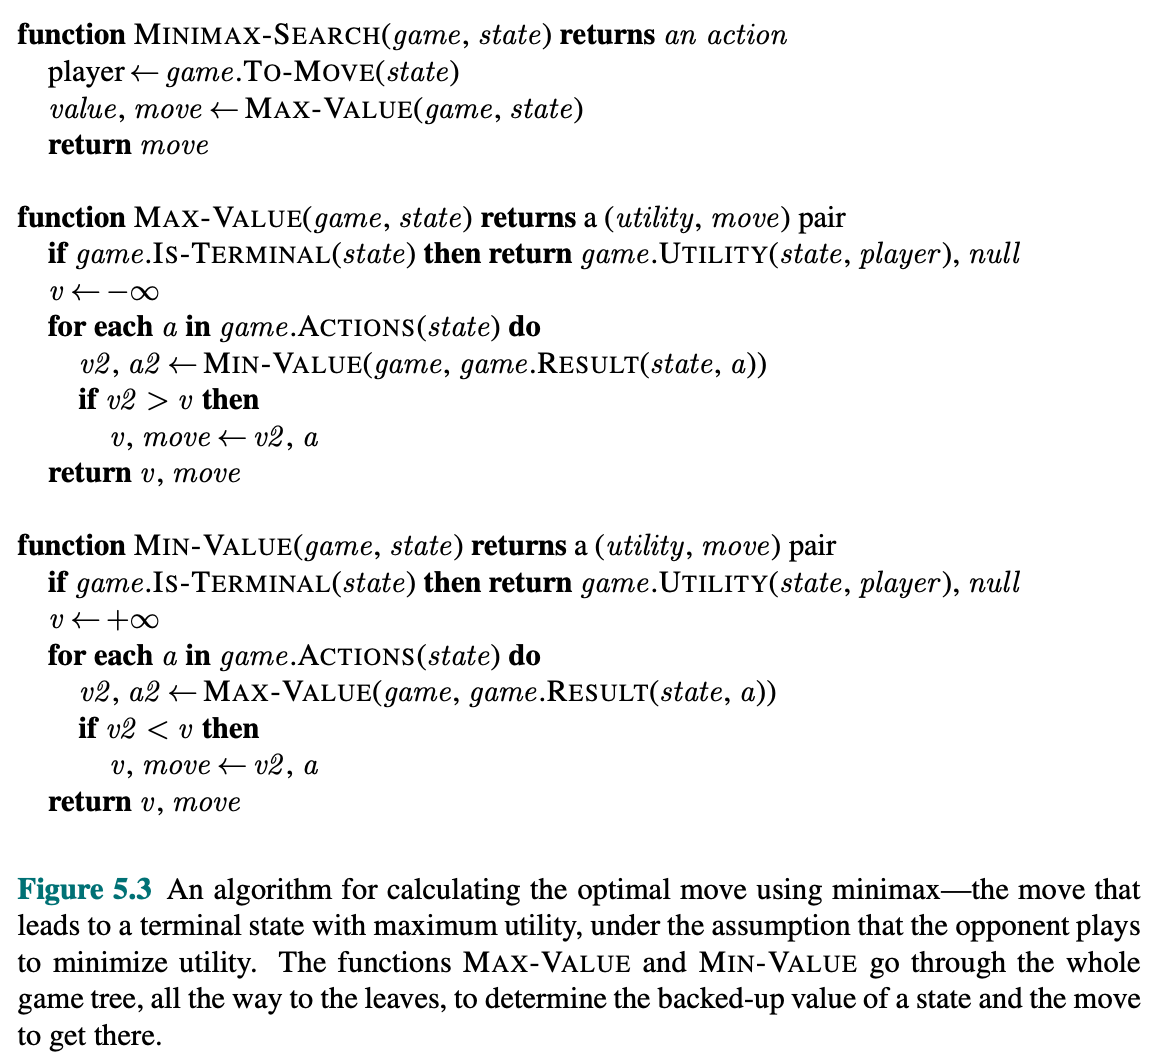

In [ ]:
# pseudocode("Minimax-Decision")
from IPython.display import Image
Image(filename='/content/AIMA_W04_03.png', width = 450, height = 500)

### 3.1 Minmax implementation

In the implementation we are using two functions, `max_value` and `min_value`, to calculate the best move for `MAX` and `MIN`, respectively. These functions interact in an alternating recursion: one calls the other until a terminal state is reached. When the recursion halts, we are left with scores for each move. We return the `MAX`. Despite returning the `MAX`, it will work for `MIN` too, since for `MIN` the values are their negative (hence the order of values is reversed, so the higher the better for `MIN` too).

In [ ]:
psource(minmax_decision)

### 3.2 Fig52 played with minmax

We will now play the `Fig52Game` using this algorithm.

It is the turn of `MAX` to move and he is at state `A`. He can move to `B`, `C` or `D`, using moves `a1`, `a2` and `a3`, respectively. `MAX`'s goal is to maximize the end value. So, to make a decision, `MAX` needs to know the values at the aforementioned nodes and pick the greatest one. After `MAX`, it is `MIN`'s turn to play. So `MAX` wants to know what will the values of `B`, `C` and `D` be after `MIN` plays.

The problem then becomes what move will `MIN` make at `B`, `C` and `D`? The successor states of all these nodes are terminal states, so `MIN` will pick the smallest value for each node. So, for `B`, he will pick 3 (from move `b1`), for `C` he will pick 2 (from move `c1`) and for `D` he will again pick 2 (from move `d3`).

Let's see this in code:

In [ ]:
print(minmax_decision('B', fig52game))
print(minmax_decision('C', fig52game))
print(minmax_decision('D', fig52game))

Now `MAX` knows that the values for `B`, `C` and `D` are 3, 2 and 2 (produced by the above moves of `MIN`). The greatest is 3, which he will get with move `a1`. This is then the move `MAX` will make. Let's see the algorithm in full action:

In [ ]:
print(minmax_decision('A', fig52game))

---

### 3.3 Alpha-beta pruning

While **minmax** is great for computing a move, it can get tricky when the number of game states gets bigger. The algorithm needs to search all the leaves of the tree, which increase exponentially to its depth.

Here we examine the idea of **pruning** the game tree, which means removing branches that cannot possibly influence the final decision. The particular type of pruning is called **alpha-beta**, and the search in whole is called **alpha-beta search**.

To showcase what parts of the tree we don't need to search, we will take a look at the example `Fig52Game` again.


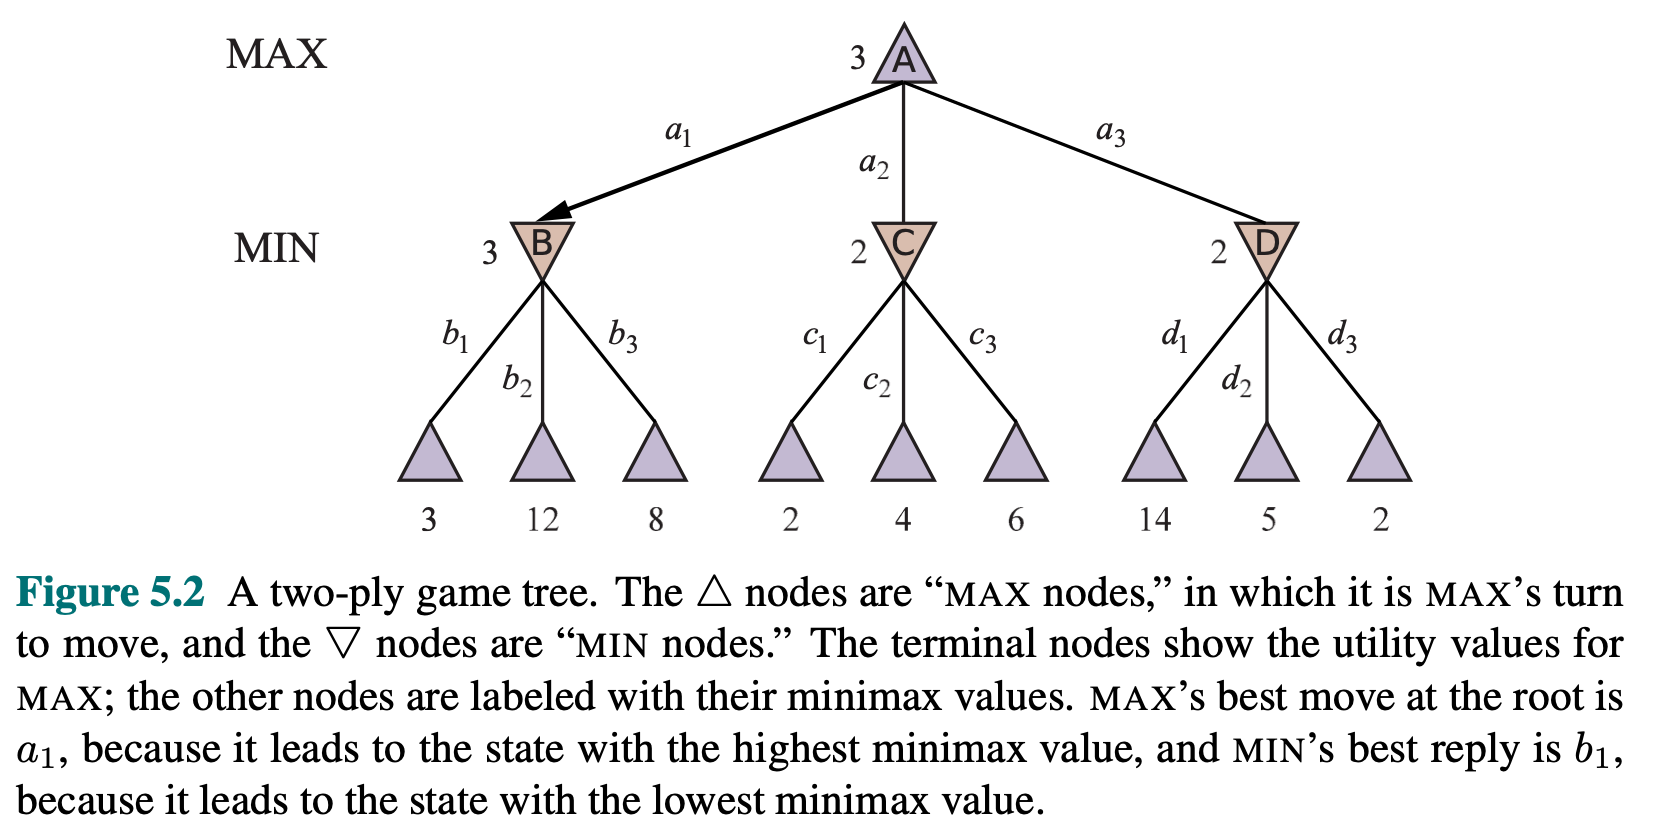

In [ ]:
from IPython.display import Image
Image(filename='/content/AIMA_W04_02.png', width = 600, height = 300)


In the example game, we need to find the best move for player `MAX` at state `A`, which is the maximum value of `MIN`'s possible moves at successor states.

- `MAX(A) = MAX( MIN(B), MIN(C), MIN(D) )`

- `MIN(B)` is the minimum of 3, 12, 8 which is 3. So the above formula becomes:

- `MAX(A) = MAX( 3, MIN(C), MIN(D) )`

The next move we will check is `c1`, which leads to a terminal state with utility of 2. Before we continue searching under state `C`, let's pop back into our formula with the new value:

- `MAX(A) = MAX( 3, MIN(2, c2, c3), MIN(D) )`

We do not know how many moves state `C` allows, but we know that the first one (`c1`) results in a value of 2. **Do we need to keep searching under C?** The answer is **no**. The value `MIN` will pick at state `C` will at most be 2. Since `MAX` already has the option to pick that 3 from `B`, he does not need to keep searching under `C`.

And **what about D**? Its first leaf node (`d1`) worth 14, so the root node has now at most 14. The next nodes (`d2` and `d3`) are worth 5 and 2, respectively. So, `MAX`'s decision at the root is moving to `B`, giving a value of 3.

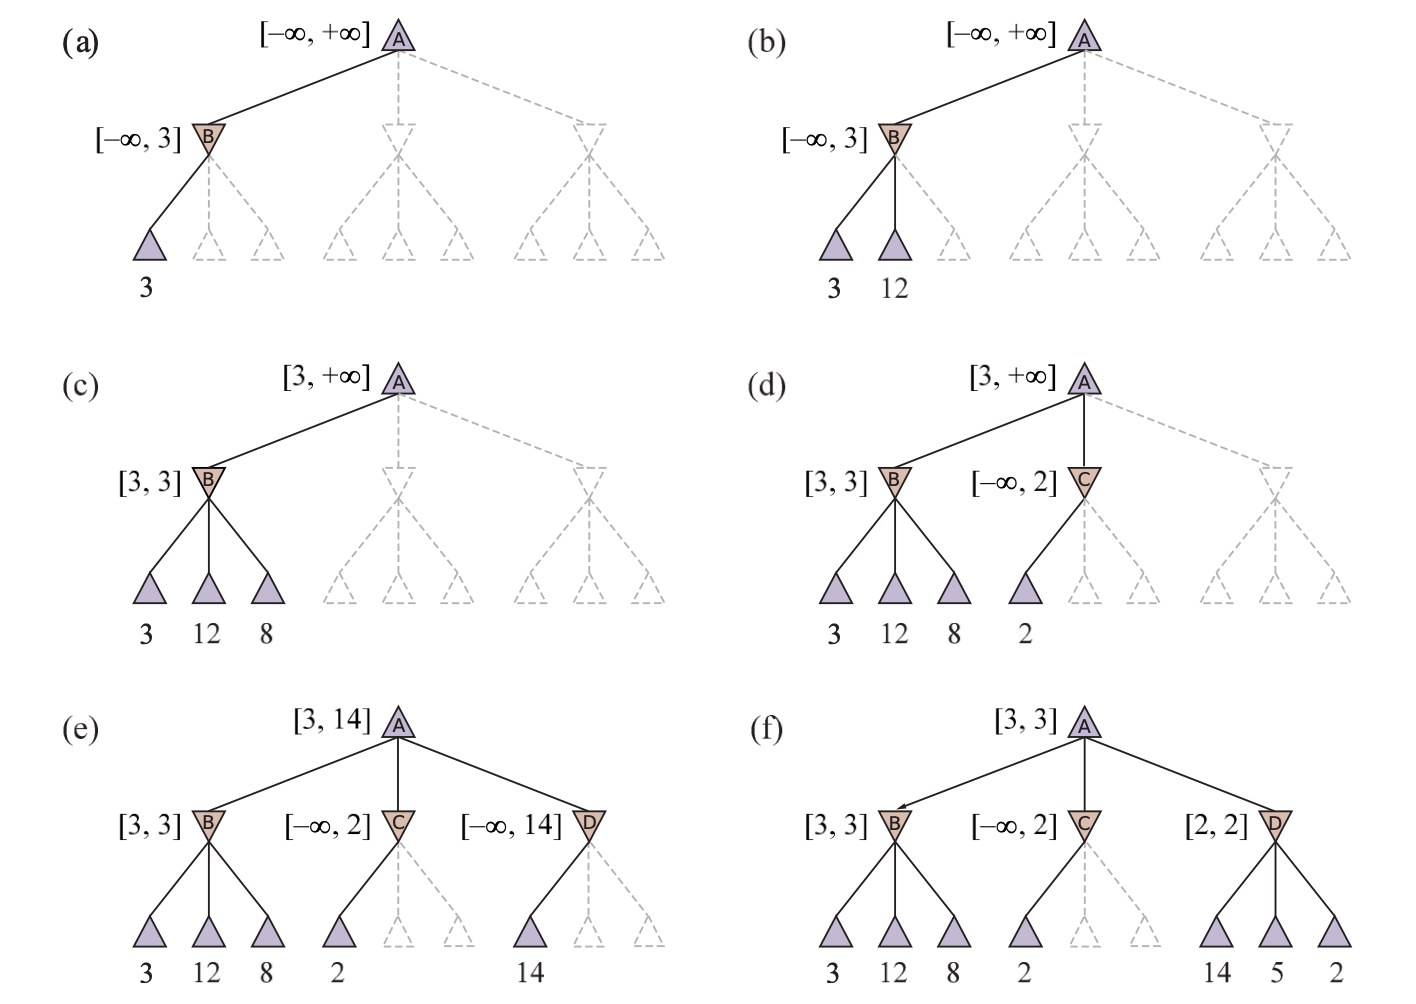

In [ ]:
from IPython.display import Image
Image(filename='/content/AIMA_W04_04.png', width = 600, height = 500)

### How alpha-beta differs from minmax?

In **alpha-beta**, we make use of two additional parameters for each state/node, $\alpha$ and $\beta$, that describe bounds on the backed-up values that appear anywhere along the path. The parameter $\alpha$ denotes the best choice (highest value) for `MAX` along that path, while $\beta$ denotes the best choice (lowest value) for `MIN`. As we go along, we update $\alpha$ and $\beta$ and prune a node branch when the value of the node is worse than the value of $\alpha$ and $\beta$ for `MAX` and`MIN`, respectively.

In the above example, after the search under state `B`, `MAX` had an $\alpha$ value of 3. So, when searching node `C`, we found a value less than 2, so we stopped searching under `C`.

You can read the pseudocode below:

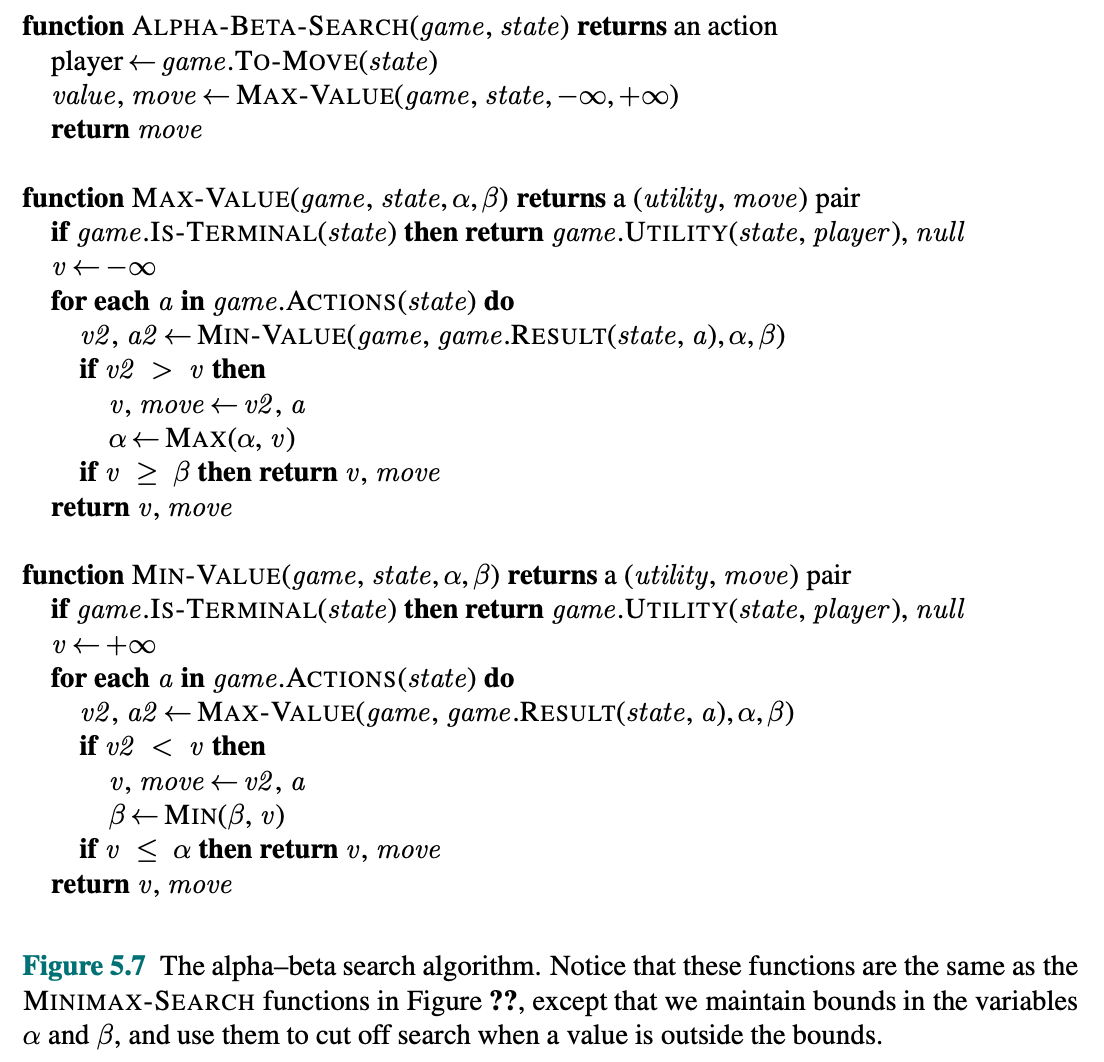

In [ ]:
#pseudocode("Alpha-Beta-Search")
from IPython.display import Image
Image(filename='/content/AIMA_W04_05.png', width = 500, height = 500)

### 3.4 Alpha-beta pruning implementation

Like **minmax**, we again make use of functions `max_value` and `min_value`, but this time we utilise the `a` and `b` values, updating them and stopping the recursive call if we end up on nodes with values worse than `a` and `b` (for `MAX` and `MIN`). The algorithm finds the maximum value and returns the move that results in it.

In [ ]:
# psource alpha_beta_search
psource(alpha_beta_search)

### 3.5 Fig52 played with alpha-beta pruning

We will play the `Fig52Game` with the **alpha-beta search** algorithm. It is the turn of `MAX` to play at state `A`.

In [ ]:
print(alpha_beta_search('A', fig52game))

The optimal move for `MAX` is `a1`, for the reasons given above. `MIN` will pick move `b1` for `B` resulting in a value of 3, updating the `a` value of `MAX` to 3. Then, when we find under `C` a node of value 2, we will stop searching under that sub-tree since it is less than `a`. From `D` we have a value of 2. So, the best move for `MAX` is the one resulting in a value of 3, which is `a1`.

Below we see the best moves for `MIN` starting from `B`, `C` and `D` respectively. Note that the algorithm in these cases works the same way as **minimax**, since all the nodes below the aforementioned states are terminal.

In [ ]:
print(alpha_beta_search('B', fig52game))
print(alpha_beta_search('C', fig52game))
print(alpha_beta_search('D', fig52game))

## 4. Players

So, we have finished the implementation of the `Fig52Game` class -- defining the rules of the game. We need more to create an AI that can actually play the game. This is where **different players (agents) can be created to play the game**.

### random_player
The `random_player` is a function that plays random moves in the game. That's it. There isn't much more to explain about this agent.

### minimax_player
The `minimax_player` calls the `minimax_search` function which returns the best move in the current game state.

### alpha_beta_player
The `alpha_beta_player` calls the `alpha_beta_search` function, which returns the best move in the current game state. Thus, the `alpha_beta_player` always plays the best move given a game state, assuming that the game tree is small enough to be entirely searched.

### query_player
The `query_player` function allows you, a human opponent, to play the game. This function requires a `display()` method to be implemented in your game class, so that successive game states can be displayed on the terminal, making it easier for you to visualize the game and play accordingly.

### play_game
The `play_game` function will be the one that will actually be used to play the game. You pass as arguments to it an instance of the game you want to play and the players you want in this game. Use it to play AI vs AI, AI vs human, or even human vs human matches!

---

## 5. Let's play some games!

We will initialise a new instance of the game and play with different players (agents).



In [25]:
# new instance of Fig52Game
game52 = Fig52()

First we try out our `random_player(game, state)`: given a game state it will give us a random move every time:

In [ ]:
# psource(random_player)

In [ ]:
print(random_player(game52, 'A'))
print(random_player(game52, 'A'))

The `alpha_beta_player(game, state)` will always give us the best possible move for the relevant player (`MAX` or `MIN`):

In [ ]:
# psource(alpha_beta_player)

In [ ]:
print( alpha_beta_player(game52, 'A') )
print( alpha_beta_player(game52, 'B') )
print( alpha_beta_player(game52, 'C') )

What the `alpha_beta_player` does is to call the method `alpha_beta_search`. In the module, both `alpha_beta_search` and `minimax_decision` have been implemented. They both do the same job and return the same thing, which is, the best move in the current state. It's just that `alpha_beta_search` is more efficient with regards to time because it prunes the search tree and hence, explores lesser number of states.

In [ ]:
%%timeit
minmax_decision('A', game52)

In [ ]:
%%timeit
alpha_beta_search('A', game52)

Demonstrating the `play_game` function on the `game52`:

In [ ]:
game52.play_game(alpha_beta_player, alpha_beta_player)

In [ ]:
game52.play_game(alpha_beta_player, random_player)

In [ ]:
game52.play_game(query_player, alpha_beta_player)

In [ ]:
game52.play_game(alpha_beta_player, query_player)

In [ ]:
game52.play_game(query_player, query_player)

## 6. Homework



### 6.1 Rock paper scissors (toy example)
Andy and Bob play a game of rock paper scissors. Instead of revealing hands at same time, we ask Alice to show her hand first, then Bob responds. This is a trivial zero-sum game; we only use this toy example as an exercise for you here.

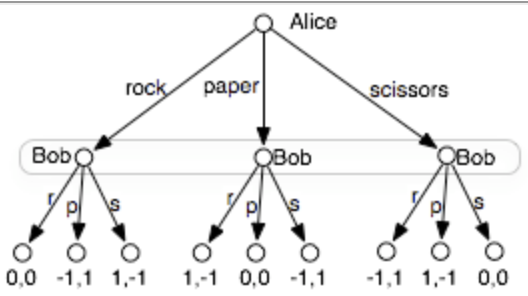

In [ ]:
from IPython.display import Image
Image(filename='/content/w04_RockPaperScissor.png', width = 500, height = 300)

In [ ]:
# class RPS
class RPS(Game):
  pass
  # <YOUR CODE HERE>

Try playing with this game.

In [ ]:
# instantiate a RPS game object
RPSgame = RPS()

In [ ]:
# checking for actions
print(RPSgame.actions('B'))

['Rock', 'Paper', 'Scissors']


In [ ]:
# checking for the result of a particular move
print(RPSgame.result('A', 'Paper'))

### 6.2 Sharing game

Consider a sharing game where there are two agents, Andy and Barb. There are two identical items to be divided between them. Andy first selects how they will be divided: (1) Andy keeps both items, (2) they share and each person gets one item, or (3) he gives both items to Barb. Then Barb gets to either reject the allocation and they both get nothing, or accept the allocation and they both get the allocated amount.


Note that this is not a zero-sum game, as the sum of rewards for the two players are not the same on each terminal state. Optimal strategies depend on other things, such as sub-goals and whether they can communicate.

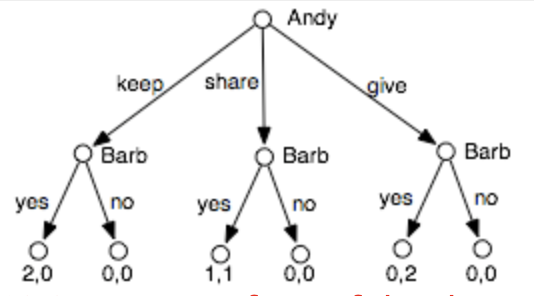

In [ ]:
from IPython.display import Image
Image(filename='/content/w04_SharingGame.png', width = 500, height = 300)

## Complete code for class Fig52

```
# class Fig52
class Fig52(Game):

  # namedtuple to represent moves, utilities and initial state
  # moves is a nested dictionary: the outer dictionary has 'states' as keys and all possible 'moves' as values.
  # The inner dictionary of 'moves' has the 'moves names' as keys and the 'next state' (after the move is complete) as valies.
  moves = dict(A=dict(a1='B', a2='C', a3='D'),
               B=dict(b1='B1', b2='B2', b3='B3'),
               C=dict(c1='C1', c2='C2', c3='C3'),
               D=dict(d1='D1', d2='D2', d3='D3')
  )
  # utils is a dictionary of leaf nodes (as keys) and their corresponding utility (as values)
  utils = dict(B1=3, B2=12, B3=8, C1=2, C2=4, C3=6, D1=14, D2=5, D3=2)
  # initial state of the game
  initial = 'A'

  def actions(self, state):
    """Return a list of the allowable moves at this point."""
    return list(self.moves.get(state, {}).keys())

  def result(self, state, move):
    """Return the state that results from making a move from a state."""
    return self.moves[state][move]

  def utility(self, state, player):
    """Return the value of this final state to player."""
    if player == 'MAX':
      return self.utils[state]
    else:
      return -self.utils[state]

  def terminal_test(self, state):
     """Return True if this is a final state for the game."""
     return state not in ('A', 'B', 'C', 'D')

  def to_move(self, state):
     """Return the player whose move it is in this state."""
     return 'MIN' if state in 'BCD' else 'MAX'
```

## Complete code for class RPS

```
# class RPS
class RPS(Game):
  moves = dict(A=dict(Rock='B', Paper='C', Scissors='D'),
               B=dict(Rock='B1', Paper='B2', Scissors='B3'),
               C=dict(Rock='C1', Paper='C2', Scissors='C3'),
               D=dict(Rock='D1', Paper='D2', Scissors='D3')
  )

  # utils is a dictionary of leaf nodes (as keys) and their corresponding utility (as values)
  utils = dict(B1=0, B2=-1, B3=1, C1=1, C2=0, C3=-1, D1=-1, D2=1, D3=0)
  # initial state of the game
  initial = 'A'

  def actions(self, state):
    """Return a list of the allowable moves at this point."""
    return list(self.moves.get(state, {}).keys())

  def result(self, state, move):
    """Return the state that results from making a move from a state."""
    return self.moves[state][move]

  def utility(self, state, player):
    """Return the value of this final state to player."""
    if player == 'Alice':
      return self.utils[state]
    else:
      return -self.utils[state]

  def terminal_test(self, state):
     """Return True if this is a final state for the game."""
     return state not in ('A', 'B', 'C', 'D')

  def to_move(self, state):
     """Return the player whose move it is in this state."""
     return 'Bob' if state in 'BCD' else 'Alice'
```